In [2]:
import pandas as pd 
from scipy.io import arff
from rulekit import RuleKit
from rulekit.regression import RuleRegressor
from rulekit.params import Measures

from rulexai.explainer import RuleExplainer

# CPU

## Read data

In [3]:
dataset_path = "./data/cpu.arff"
data = pd.DataFrame(arff.loadarff(dataset_path)[0])

# code to change encoding of the file
tmp_df = data.select_dtypes([object])
tmp_df = tmp_df.stack().str.decode("utf-8").unstack()
for col in tmp_df:
    data[col] = tmp_df[col].replace({"?": None})

x = data.drop(["class"], axis=1)
y = data["class"]

## Train RuleKit model

In [11]:
# RuleKit
RuleKit.init()

reg = RuleRegressor(
    induction_measure=Measures.C2,
    pruning_measure=Measures.C2,
    voting_measure=Measures.C2,
)
reg.fit(x, y)

### Rules

In [12]:
for rule in reg.model.rules:
    print(rule, rule.stats)

IF vendor = {formation} THEN class = {34} [34,34] (p = 5.0, n = 0.0, P = 6.0, N = 203.0, weight = 0.9166666666666667, pvalue = 0.0)
IF MMIN = <80, inf) AND MMAX = (-inf, 1750) THEN class = {18} [16.92,19.08] (p = 10.0, n = 1.0, P = 11.0, N = 198.0, weight = 0.8629476584022039, pvalue = 7.355108555449812e-21)
IF MMIN = <756, inf) AND MMAX = (-inf, 4250) AND CHMAX = <7, 22) AND CHMIN = (-inf, 3.50) THEN class = {32} [30.64,33.36] (p = 4.0, n = 1.0, P = 7.0, N = 202.0, weight = 0.6231258840169731, pvalue = 1.1803717269256882e-08)
IF MMIN = <756, inf) AND MMAX = (-inf, 4250) AND MYCT = (-inf, 232.50) AND CHMAX = <3.50, 22) AND CHMIN = (-inf, 3.50) THEN class = {29} [24.98,33.02] (p = 15.0, n = 3.0, P = 35.0, N = 174.0, weight = 0.5712917350848385, pvalue = 7.408462419973687e-25)
IF MMIN = (-inf, 1500) AND MMAX = <1500, 4250) AND MYCT = <94.50, inf) AND CHMAX = <2.50, 44) THEN class = {24} [21.77,26.23] (p = 18.0, n = 7.0, P = 23.0, N = 186.0, weight = 0.6108789153810191, pvalue = 1.1832672

## RuleXAI

In [13]:
explainer = RuleExplainer(model=reg, X=x, y=y, type="regression")
explainer.explain()

### Feature importance 

In [14]:
explainer.feature_importances_

,attributes,importances
3,MMAX,4.014332
2,CHMIN,3.028757
6,vendor,0.916667
1,CHMAX,0.460550
0,CACH,0.289558
4,MMIN,0.167137
5,MYCT,-1.233983


### Condition importance

In [15]:
explainer.condition_importances_

,conditions,importances
0,"CHMIN = (-inf, 10.0)",2.127775
1,vendor = {formation},0.916667
2,"MMAX = (-inf, 4750.0)",0.848642
3,"MMAX = (-inf, 1750.0)",0.827179
4,"MYCT = <87.0, inf)",0.643064
5,"MMAX = (-inf, 4250.0)",0.528220
6,"MMAX = <7150.0, 24000.0)",0.481404
7,"CHMIN = (-inf, 14.0)",0.402859
8,"MMAX = <28000.0, inf)",0.381381
9,"MMAX = <24000.0, 48000.0)",0.339882


### Local explainability

Example:
vendor    adviser
MYCT        125.0
MMIN        256.0
MMAX       6000.0
CACH        256.0
CHMIN        16.0
CHMAX       128.0
class       199.0
Name: 0, dtype: object

Rules that covers this example:
IF MMIN = (-inf, 2150.0) AND MMAX = <5000.0, 9240.0) AND MYCT = (-inf, 146.5) AND CHMAX = <5.5, inf) THEN class = {46.0}

Importances of the conditions from rules covering the example
                conditions  importances
0  MMAX = <5000.0, 9240.0)     0.198756
1    MMIN = (-inf, 2150.0)     0.185016
2       CHMAX = <5.5, inf)    -0.074637
3     MYCT = (-inf, 146.5)    -0.117779


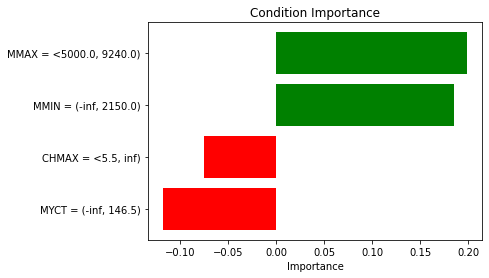

,conditions,importances
0,"MMAX = <5000.0, 9240.0)",0.198756
1,"MMIN = (-inf, 2150.0)",0.185016
2,"CHMAX = <5.5, inf)",-0.074637
3,"MYCT = (-inf, 146.5)",-0.117779


In [16]:
explainer.local_explainability(x.iloc[0, :], pd.DataFrame(y).iloc[0, :], plot = True)